**Import Libraries**

In [103]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

**Load Dataset**

In [104]:
df= pd.read_csv("/content/drive/MyDrive/Projects/CODSOFT/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Check Null Values**

In [105]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [106]:
df.shape

(150, 5)

In [107]:
species_list = df['species'].unique().tolist()
species_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

**Ploting**

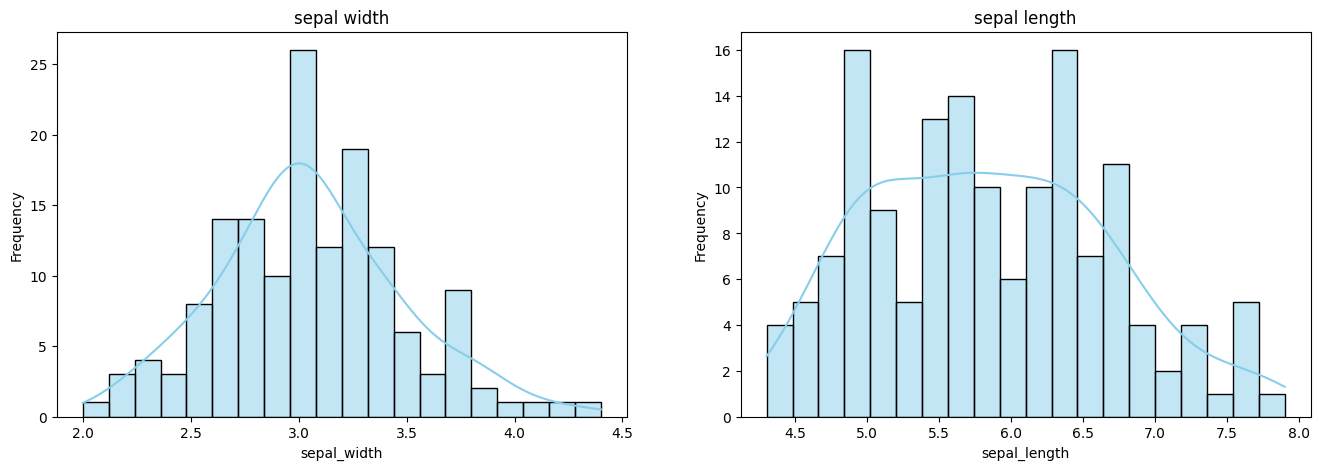

In [108]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='sepal_width', kde=True, bins=20, color='skyblue')
plt.title("sepal width")
plt.xlabel("sepal_width")
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.histplot(data=df, x='sepal_length', kde=True, bins=20, color='skyblue')
plt.title("sepal length")
plt.xlabel("sepal_length")
plt.ylabel('Frequency')

plt.show()

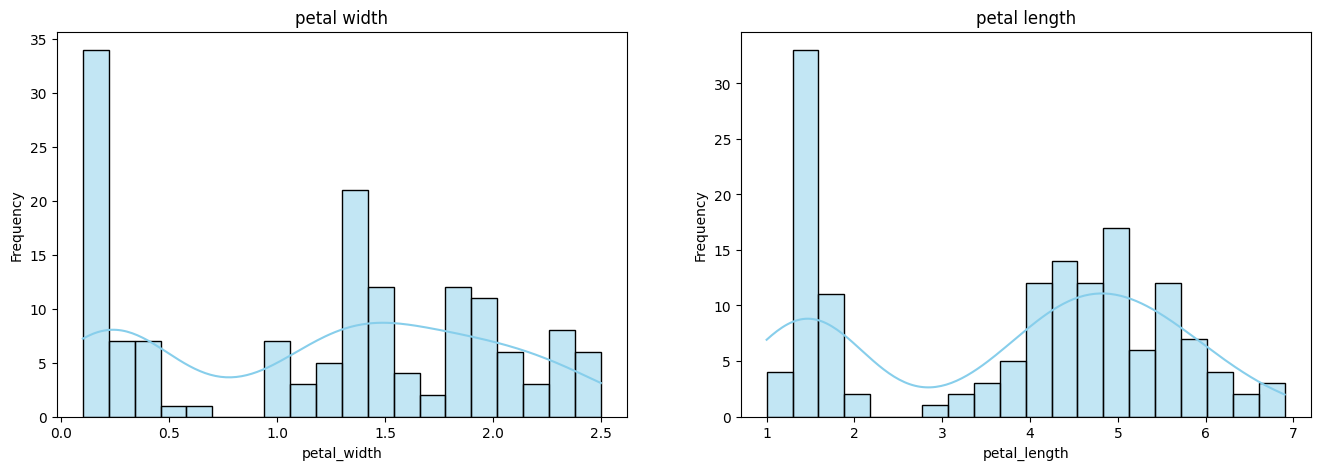

In [109]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='petal_width', kde=True, bins=20, color='skyblue')
plt.title("petal width")
plt.xlabel("petal_width")
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.histplot(data=df, x='petal_length', kde=True, bins=20, color='skyblue')
plt.title("petal length")
plt.xlabel("petal_length")
plt.ylabel('Frequency')

plt.show()

**Preprocess**

In [110]:
Le = LabelEncoder()
df['species_code'] = Le.fit_transform(df['species'])

df.drop('species', axis=1, inplace=True)
print(df.head())

spcL = df['species_code'].unique().tolist()
print(spcL)

   sepal_length  sepal_width  petal_length  petal_width  species_code
0           5.1          3.5           1.4          0.2             0
1           4.9          3.0           1.4          0.2             0
2           4.7          3.2           1.3          0.2             0
3           4.6          3.1           1.5          0.2             0
4           5.0          3.6           1.4          0.2             0
[0, 1, 2]


In [111]:
spc_dict = {}
spcL_len = len(spcL)
for i in range(spcL_len):
  spc_dict[spcL[i]] = species_list[i]

print(spc_dict)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


**Split Data**

In [112]:
x = df.drop('species_code', axis=1)
y = df['species_code']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

**Model Prediction**

In [113]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

# predictions on the test set
y_pred = knn_classifier.predict(x_test)

**Model Evaluation**

In [114]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print()
print(f"Confusion Matrix:\n{confusion_mat}")
print()
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

